<h1>Visualisation de la data</h1>

In [1]:
#importation des librairies
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("ScoringTraining.csv", sep=',')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [2]:
df=df.drop('Unnamed: 0',1)

In [3]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# La proportion de défauts

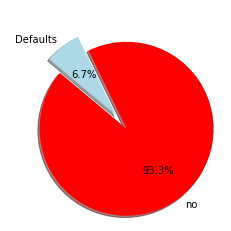

In [3]:
non_defaults = sum(df["SeriousDlqin2yrs"] == 0);
defaults = sum(df["SeriousDlqin2yrs"] == 1);
total = len(df["SeriousDlqin2yrs"]);

# Data to plot
labels = 'no', 'Defaults'
sizes = [non_defaults, defaults]
colors = ['red', 'lightblue']
explode = (0.2, 0)  # explode 1st slice

# Plot
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
                                    shadow=True, startangle=140);

# Missing data 

In [5]:
#number of missing data
missing = df.isnull().sum()
missing 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

<AxesSubplot:>

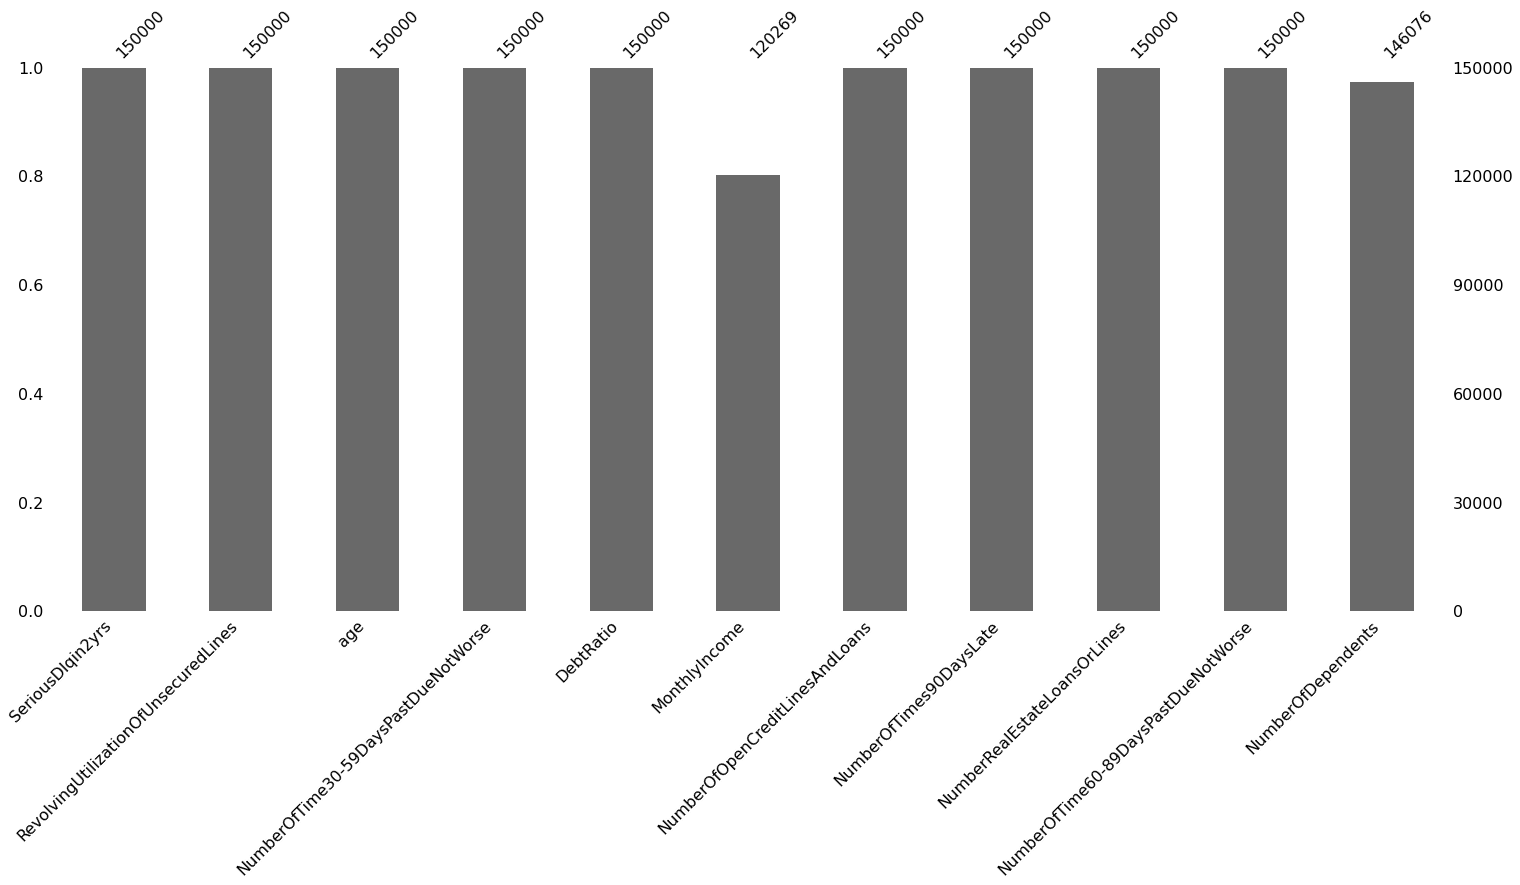

In [6]:
import pandas as pd 
import missingno as msno
msno.bar(df)

<AxesSubplot:>

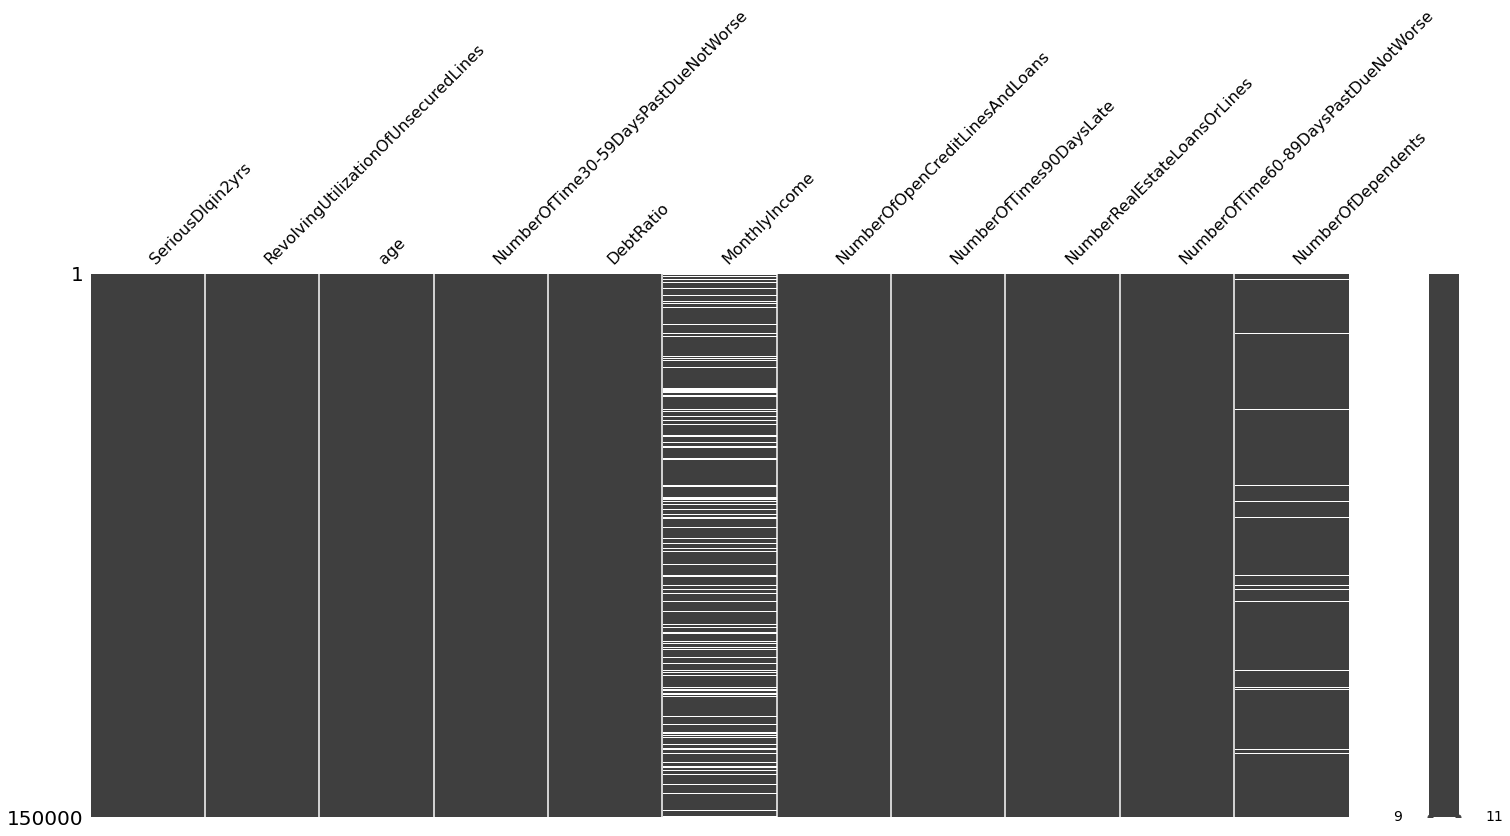

In [7]:
import pandas as pd
import missingno as msno
msno.matrix(df)

In [8]:
#On remplace toutes les valeurs nulles par la médiane
df=df.fillna(df.median())

<AxesSubplot:>

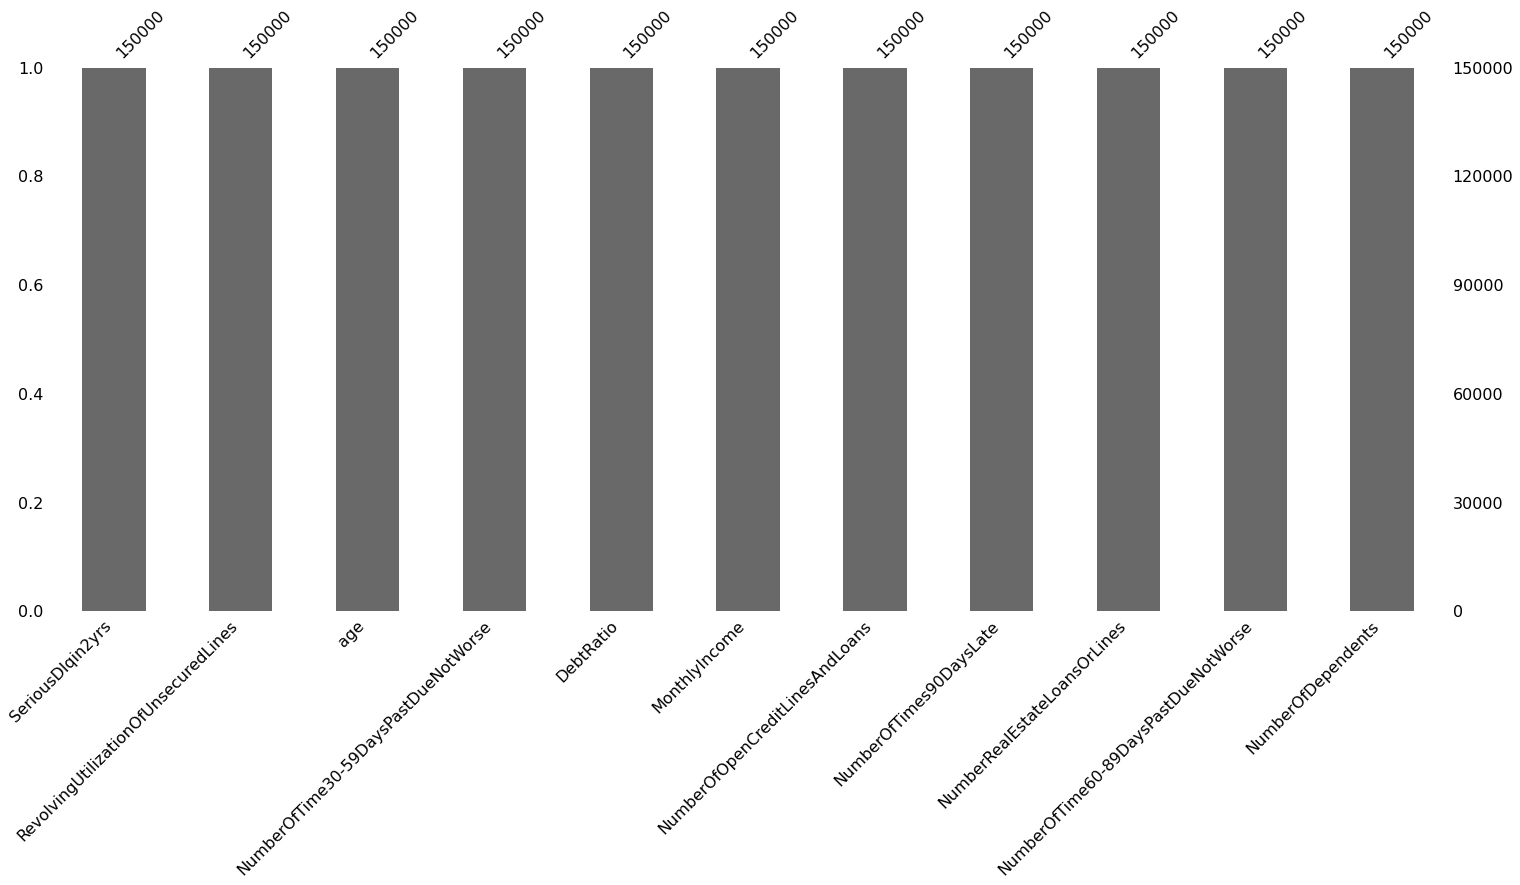

In [9]:
import pandas as pd 
import missingno as msno
msno.bar(df)

<AxesSubplot:>

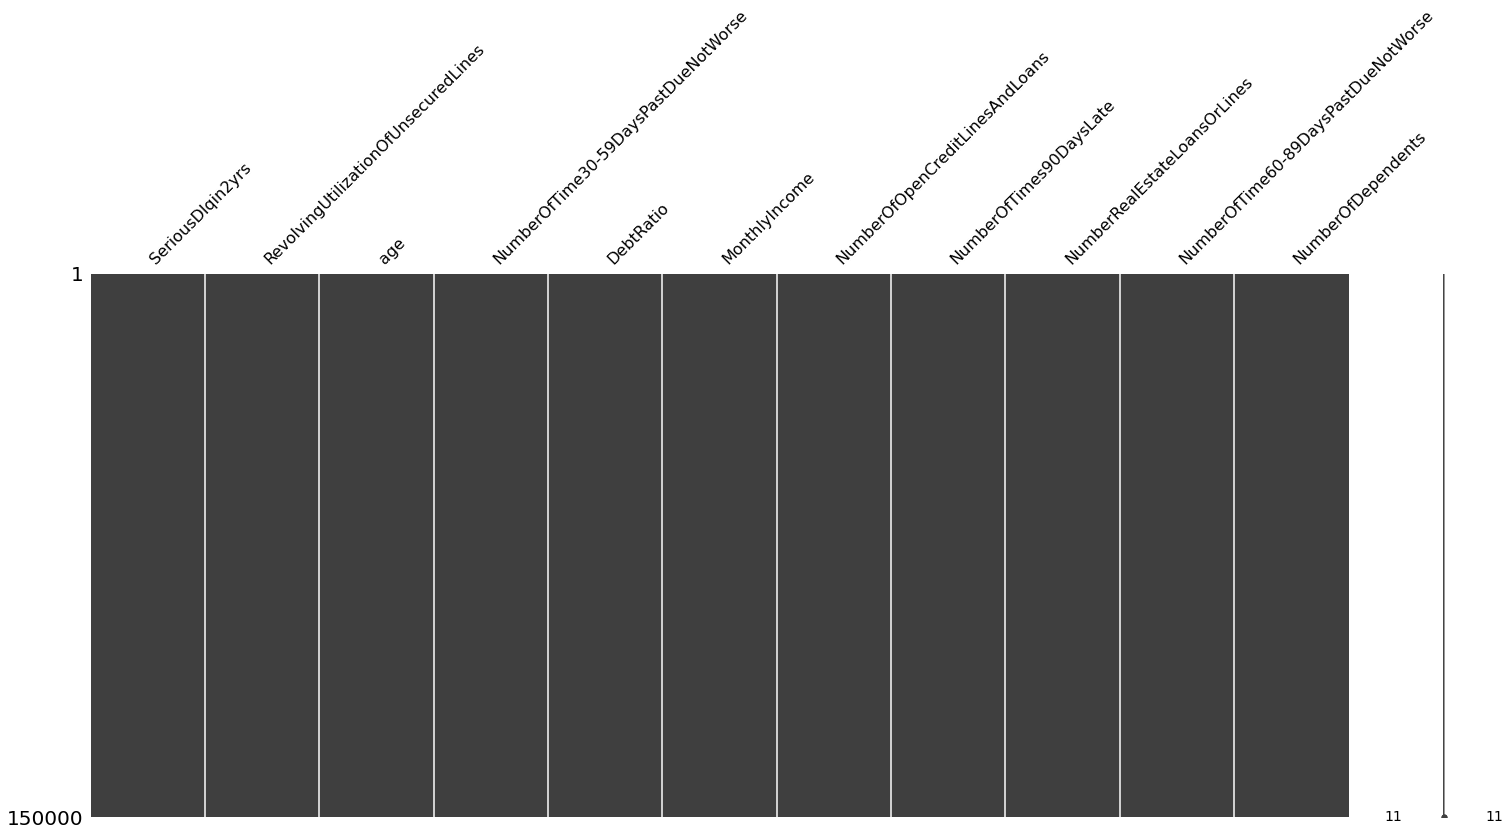

In [10]:
import pandas as pd
import missingno as msno
msno.matrix(df)

# Identifying Outliers

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

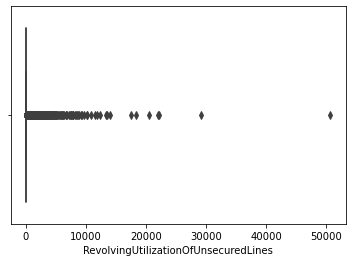

In [11]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["RevolvingUtilizationOfUnsecuredLines"])


<AxesSubplot:xlabel='age'>

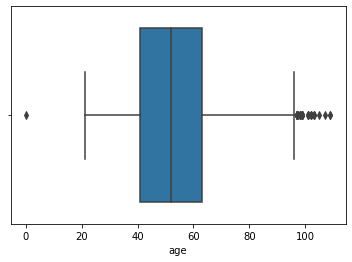

In [12]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

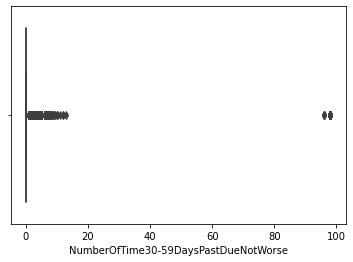

In [13]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberOfTime30-59DaysPastDueNotWorse"])

<AxesSubplot:xlabel='DebtRatio'>

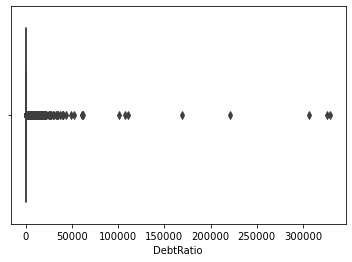

In [14]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["DebtRatio"])

<AxesSubplot:xlabel='MonthlyIncome'>

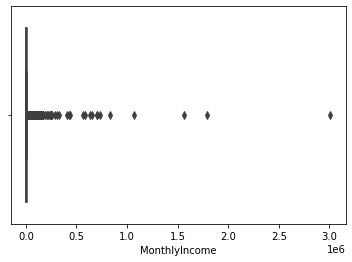

In [15]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["MonthlyIncome"])

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans'>

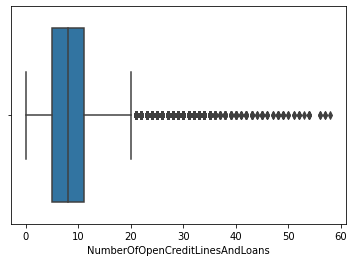

In [16]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberOfOpenCreditLinesAndLoans"])

<AxesSubplot:xlabel='NumberOfTimes90DaysLate'>

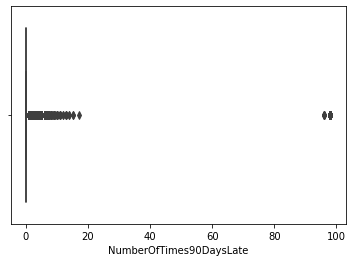

In [17]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberOfTimes90DaysLate"])

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines'>

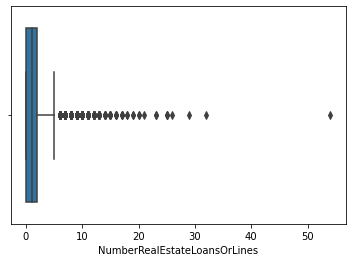

In [18]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberRealEstateLoansOrLines"])

<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse'>

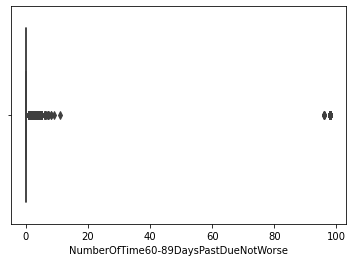

In [19]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberOfTime60-89DaysPastDueNotWorse"])

<AxesSubplot:xlabel='NumberOfDependents'>

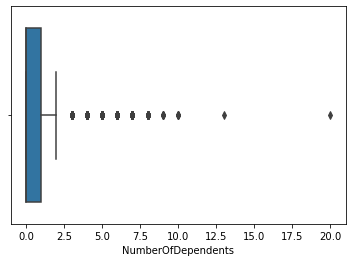

In [20]:
import matplotlib as plt
import seaborn as sns 
sns.boxplot(x=df["NumberOfDependents"])

<h2>Removing outliers:

In [21]:
for column in df.columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    print(column,' :lower limit', Q1-1.5 *IQR,' Upper limit:', Q3 + 1.5 *IQR)

SeriousDlqin2yrs  :lower limit 0.0  Upper limit: 0.0
RevolvingUtilizationOfUnsecuredLines  :lower limit -0.7639007662499999  Upper limit: 1.35281445575
age  :lower limit 8.0  Upper limit: 96.0
NumberOfTime30-59DaysPastDueNotWorse  :lower limit 0.0  Upper limit: 0.0
DebtRatio  :lower limit -0.8646960792499998  Upper limit: 1.9080236847499998
MonthlyIncome  :lower limit -1342.5  Upper limit: 12645.5
NumberOfOpenCreditLinesAndLoans  :lower limit -4.0  Upper limit: 20.0
NumberOfTimes90DaysLate  :lower limit 0.0  Upper limit: 0.0
NumberRealEstateLoansOrLines  :lower limit -3.0  Upper limit: 5.0
NumberOfTime60-89DaysPastDueNotWorse  :lower limit 0.0  Upper limit: 0.0
NumberOfDependents  :lower limit -1.5  Upper limit: 2.5


In [22]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [23]:
df["NumberOfTimes90DaysLate"].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [24]:
df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [25]:
#Eliminer les enregistrements contenant les outliers pour les variables:
#NumberOfTime60-89DaysPastDueNotWorse
#NumberOfTimes90DaysLate
#NumberOfTime60-89DaysPastDueNotWorse
df=df[(df["NumberOfTime60-89DaysPastDueNotWorse"]<96)&(df["NumberOfTimes90DaysLate"]<96)
      &(df["NumberOfTime60-89DaysPastDueNotWorse"]<96)]
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [26]:
#Pour la variable age, on remplace la valeure nulle par la médiane
import numpy as np
median = df['age'].median()
df["age"] = np.where(df["age"]==0 , median,df['age'])

In [27]:
#Eliminer les enregistrements contenant les outliers pour les variables:
#RevolvingUtilizationOfUnsecuredLines
#DebtRatio
#NumberOfOpenCreditLinesAndLoans
#NumberRealEstateLoansOrLines
#NumberOfDependents
df=df[(df["RevolvingUtilizationOfUnsecuredLines"]<=1.35)&(df["DebtRatio"]<=1.90)
      &(df["NumberOfOpenCreditLinesAndLoans"]<=20)&(df["NumberRealEstateLoansOrLines"]<=5)&(df["NumberOfDependents"]<=2.5)]
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40.0,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38.0,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30.0,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74.0,0,0.375607,3500.0,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50.0,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74.0,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44.0,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30.0,0,0.000000,5716.0,4,0,0,0,0.0


# Equilibrage des données d’apprentissage :

In [28]:
#Le nombre d'individus ayant la classe 0, et ceux ayant la classe 1
pd.Series(list(df.SeriousDlqin2yrs)).value_counts()

0    95984
1     6593
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
x=df
y=df.SeriousDlqin2yrs
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
#print(pd.Series(list(x_test.SeriousDlqin2yrs)).value_counts())
#downsampling test data
test_majority = x_test[x_test.SeriousDlqin2yrs==0]
test_minority =x_test[x_test.SeriousDlqin2yrs==1]
test_majority_downsampled = resample(test_majority, 
                                 replace=False,    
                                 n_samples=len(test_minority))

TestingData = pd.concat([test_majority_downsampled, test_minority])
print("nombre des 0 et des 1 dans la TestingData['SeriousDlqin2yrs']")
print(pd.Series(list(TestingData.SeriousDlqin2yrs)).value_counts())
#downsampling training data
train_majority = x_train[x_train.SeriousDlqin2yrs==0]
train_minority =x_train[x_train.SeriousDlqin2yrs==1]
train_majority_downsampled = resample(train_majority, 
                                 replace=False,    
                                 n_samples=len(train_minority))

TrainingData = pd.concat([train_majority_downsampled, train_minority])
print("nombre de 0 et 1 dans la TrainingData['SeriousDlqin2yrs']")
print(pd.Series(list(TrainingData.SeriousDlqin2yrs)).value_counts())

nombre des 0 et des 1 dans la TestingData['SeriousDlqin2yrs']
1    1354
0    1354
dtype: int64
nombre de 0 et 1 dans la TrainingData['SeriousDlqin2yrs']
1    5239
0    5239
dtype: int64


# Identification des meilleurs prédicteurs parmi les variables :

Text(0.5, 1.0, 'RevolvingUtilizationOfUnsecuredLines')

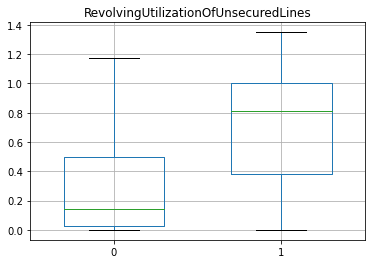

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [1], widths = 0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='RevolvingUtilizationOfUnsecuredLines',positions = [2], widths = 0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('RevolvingUtilizationOfUnsecuredLines')

Text(0.5, 1.0, 'age')

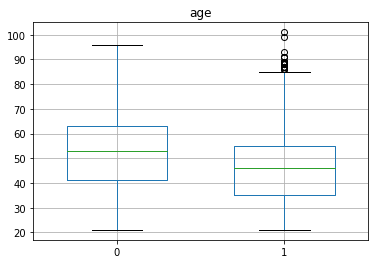

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='age',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='age',positions = [2] , widths =0.6)
ax.set_xticklabels(['0', '1'])
plt.title('age')

Text(0.5, 1.0, 'NumberOfTime30-59DaysPastDueNotWorse')

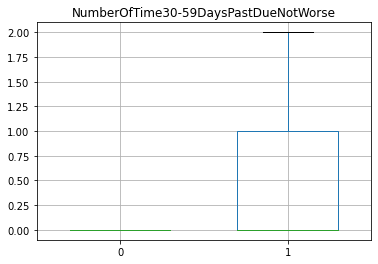

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfTime30-59DaysPastDueNotWorse',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfTime30-59DaysPastDueNotWorse')

Text(0.5, 1.0, 'DebtRatio')

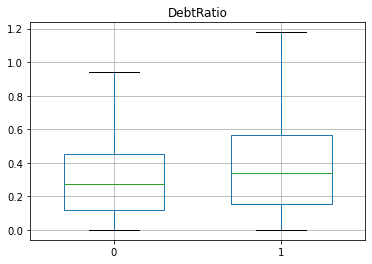

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='DebtRatio',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='DebtRatio',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('DebtRatio')

Text(0.5, 1.0, 'MonthlyIncome')

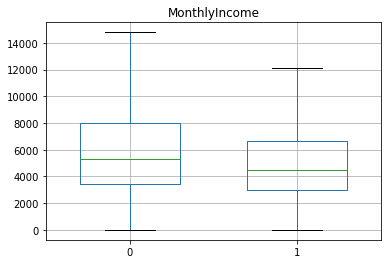

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='MonthlyIncome',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='MonthlyIncome',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('MonthlyIncome')

Text(0.5, 1.0, 'NumberOfOpenCreditLinesAndLoans')

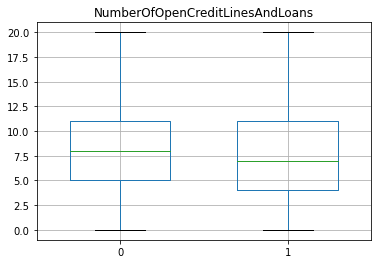

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfOpenCreditLinesAndLoans',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfOpenCreditLinesAndLoans',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfOpenCreditLinesAndLoans')

Text(0.5, 1.0, 'NumberOfTimes90DaysLate')

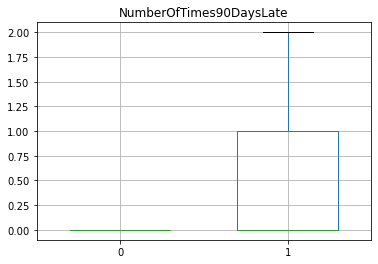

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfTimes90DaysLate',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfTimes90DaysLate',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfTimes90DaysLate')

Text(0.5, 1.0, 'NumberRealEstateLoansOrLines')

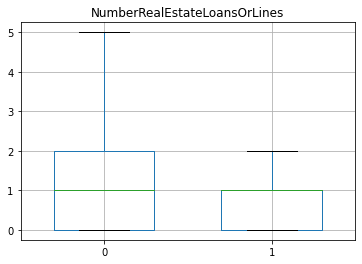

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberRealEstateLoansOrLines',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberRealEstateLoansOrLines',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberRealEstateLoansOrLines')

Text(0.5, 1.0, 'NumberOfDependents')

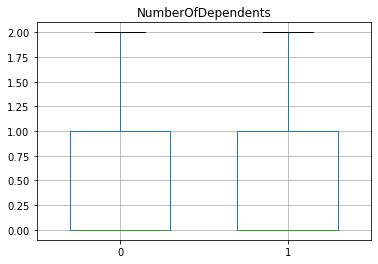

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# splitting dataframe by groups
grouped = TrainingData.groupby(TrainingData.SeriousDlqin2yrs)
# grouping by particular dataframe column
data_0 = grouped.get_group(0)
data_1 = grouped.get_group(1)

ax = plt.axes()
# first boxplot
boxplot = data_0.boxplot(column='NumberOfDependents',positions = [1] ,widths =0.6, showfliers=False)
# second boxplot
boxplot = data_1.boxplot(column='NumberOfDependents',positions = [2] , widths =0.6, showfliers=False)
ax.set_xticklabels(['0', '1'])
plt.title('NumberOfDependents')

In [42]:
columns=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfDependents']
TrainingData.drop(columns, axis=1, inplace=True)
TestingData.drop(columns, axis=1 , inplace=True)

KeyError: "['NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'\n 'NumberRealEstateLoansOrLines' 'NumberOfDependents'] not found in axis"

# II- Modèle de prévision


<h2>Splitting Data</h2>

In [43]:
import numpy as np
from sklearn import datasets
X_train=TrainingData.iloc[:,1:]
Y_train=TrainingData['SeriousDlqin2yrs']
X_train.shape,Y_train.shape

((10478, 6), (10478,))

In [44]:
import numpy as np
from sklearn import datasets
X_test=TestingData.iloc[:,1:]
Y_test=TestingData['SeriousDlqin2yrs']
X_test.shape,Y_test.shape

((2708, 6), (2708,))

# LDA

Mean Accuracy: 0.731 (0.015)


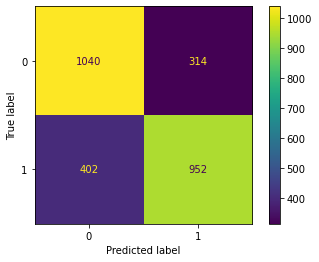

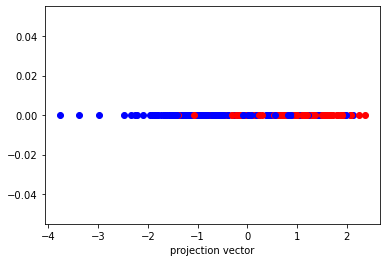

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Importation des données

model_LDA=LinearDiscriminantAnalysis(n_components=1)
# Apprentissage
score=model_LDA.fit(X_train,Y_train).transform(X_train)
#evaluate model
y_pred=model_LDA.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Goodness of fit
scores = cross_val_score(model_LDA,X_train,Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy_lda=np.mean(scores)
#Matrice de confusion
plot_confusion_matrix(model_LDA, X_test, Y_test)  
plt.show()
# Choix de 300 points aléatoires
random_choices=[random.randint(0,len(score)-1) for i in range(0,300)]
score1=[score[i] for i in random_choices]
y_train1=[Y_train.tolist()[i] for i in random_choices]
# Représentation graphique
for k,i in zip (score1,y_train1):
    if i==1:
        plt.scatter(k,0,c="b")
    else :
        plt.scatter(k,0,c="r")
plt.xlabel('projection vector')
plt.show()


# QDA

Mean Accuracy: 0.732 (0.011)


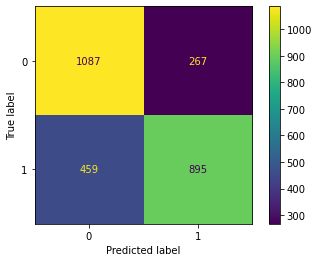

In [46]:
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
model_QDA=QuadraticDiscriminantAnalysis()
# Apprentissage
score=model_QDA.fit(X_train,Y_train)
y_predict=model_QDA.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Goodness of fit
scores = cross_val_score(model_QDA, X_train,Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
accuracy_qda=np.mean(scores)
#Matrice de confusion
plot_confusion_matrix(model_QDA, X_test, Y_test)  
plt.show()

# Regression logistique

0.7455686853766618


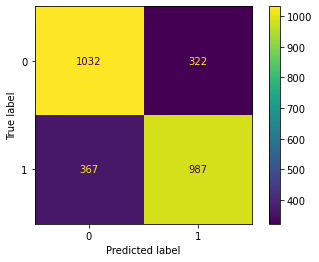

In [47]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model_LOG = LogisticRegression()
model_LOG.fit(X_train, Y_train)
y_predict = model_LOG.predict(X_test)
print(accuracy_score(Y_test, y_predict))
accuracy_LOG=accuracy_score(Y_test, y_predict)
#Matrice de confusion
plot_confusion_matrix(model_LOG, X_test, Y_test)  
plt.show()

# Random Forest

0.7348596750369276


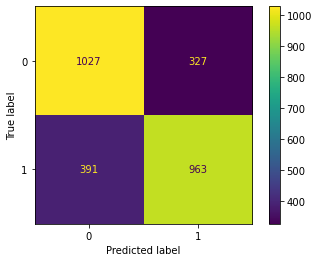

In [48]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
model_Forest= RandomForestClassifier(random_state=30)
model_Forest.fit(X_train,Y_train)
y_predict= model_Forest.predict(X_test)
print(accuracy_score(Y_test, y_predict))
accuracy_random_forest=accuracy_score(Y_test, y_predict)
#Matrice de confusion
plot_confusion_matrix(model_Forest, X_test, Y_test)  
plt.show()

# Testing and comparing other models

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix

In [50]:
names = ["KNeighbors", "SVC_poly","GuassianNB", "SGD"]
classifiers=[KNeighborsClassifier(),SVC(kernel="poly" ), GaussianNB(),SGDClassifier()]

The Accuracy of:  KNeighbors is  0.5557607090103397


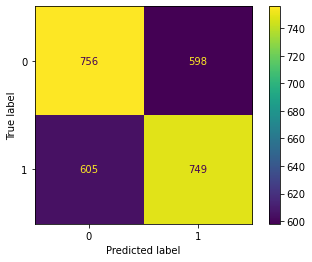





The Accuracy of:  SVC_poly is  0.49963072378138845


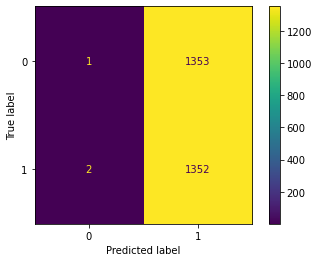





The Accuracy of:  GuassianNB is  0.7378138847858198


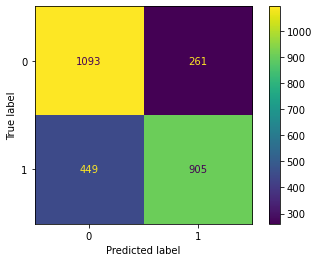





The Accuracy of:  SGD is  0.4988921713441654


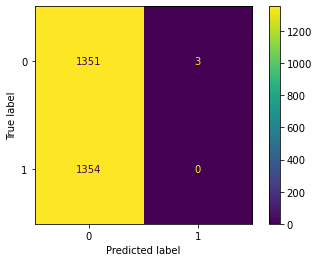

In [51]:
scores=[]
for name,model in zip(names,classifiers):
    model.fit(X_train,Y_train)
    Accuracy=model.score(X_test, Y_test)
    scores.append(Accuracy)
    print('The Accuracy of: ', name, 'is ',Accuracy )
    #Matrice de confusion
    plot_confusion_matrix(model, X_test, Y_test)  
    plt.show()
    print('\n\n\n')

In [52]:
names.append('Logistic regression')
names.append('Random Forest')
names.append('LDA')
names.append('QDA')
scores.append(accuracy_LOG)
scores.append(accuracy_random_forest)
scores.append(accuracy_lda)
scores.append(accuracy_qda)
Compare=pd.DataFrame()
Compare['name']=names
Compare['Accuracy']= scores 
Compare

,name,Accuracy
0,KNeighbors,0.555761
1,SVC_poly,0.499631
2,GuassianNB,0.737814
3,SGD,0.498892
4,Logistic regression,0.745569
5,Random Forest,0.734860
6,LDA,0.730928
7,QDA,0.732359


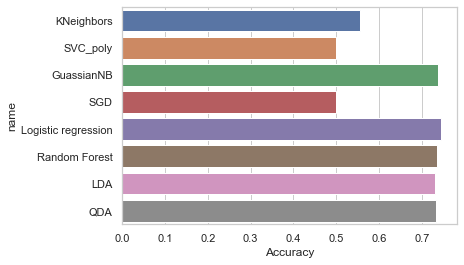

In [53]:
import seaborn as sns 
sns.set(style='whitegrid')
ax= sns.barplot(y="name",x="Accuracy",data=Compare)

# Courbes ROC 

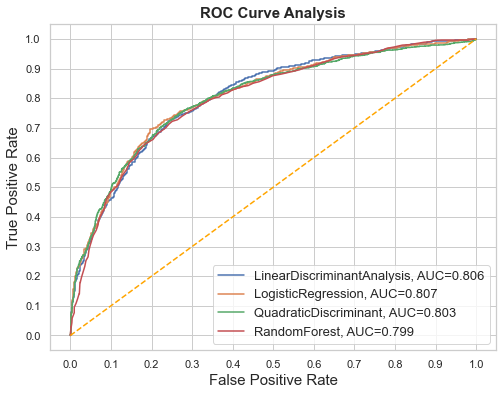

In [54]:
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Result=pd.DataFrame()
models=[model_LDA,model_LOG,model_QDA,model_Forest]
names=["LinearDiscriminantAnalysis","LogisticRegression","QuadraticDiscriminant","RandomForest"]
i=0
for m in (models):
    # predict probabilities
    predict_probs = m.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    predict_probs = predict_probs[:, 1]
    auc = roc_auc_score(Y_test, predict_probs)
    fpr, tpr, _ = roc_curve(Y_test,predict_probs )
    Result = Result.append({'model':names[i],'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
    i+=1

fig = plt.figure(figsize=(8,6))
for i in Result.index:
    plt.plot(Result.loc[i]['fpr'], 
             Result.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(Result.loc[i]['model'], Result.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()
    
